In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn

### Import Data

In [2]:
# here we import the data
swiss_energy_path = 'Data/swiss_energy_production.xlsx'
metadata = pd.read_excel(swiss_energy_path, index_col = None, header = 2)

In [3]:
#metadata = metadata.fillna(value=0)
metadata.head(10)

,Bois et charbon de bois,Unnamed: 1,Force hydraulique,Unnamed: 3,Ordures et déchets industriels,Unnamed: 5,Charbon,Unnamed: 7,Pétrole brut et produits pétroliers,Unnamed: 9,...,Combustibles nucléaires,Unnamed: 13,Autres énergies renouvelables,Unnamed: 15,Utilisation totale d'agents énergétiques,Unnamed: 17,"Electricité, solde import / export",Unnamed: 19,Consommation brute d’énergie dans le pays = 100%,Unnamed: 21
NaN,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %,...,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %
1910,17190,16.27,4500,4.26,...,...,83570,79.11,740,0.7,...,...,...,...,...,106000,100.34,-360,-0.34,105640,100
1911,17190,14.93,5400,4.69,...,...,92020,79.92,960,0.83,...,...,...,...,...,115570,100.37,-430,-0.37,115140,100
1912,17190,14.64,6120,5.21,...,...,93490,79.65,1010,0.86,...,...,...,...,...,117810,100.37,-430,-0.37,117380,100
1913,17190,14.06,6660,5.45,...,...,97890,80.04,1030,0.84,...,...,...,...,...,122770,100.38,-470,-0.38,122300,100
1914,16830,14.1,7020,5.88,...,...,95410,79.94,670,0.56,...,...,...,...,...,119930,100.49,-580,-0.49,119350,100
1915,14930,12.59,8100,6.83,...,...,96070,81.01,500,0.42,...,...,...,...,...,119600,100.85,-1010,-0.85,118590,100
1916,12590,11.15,8820,7.81,...,...,92390,81.83,180,0.16,...,...,...,...,...,113980,100.95,-1070,-0.95,112910,100
1917,13580,13.87,9720,9.93,...,...,75450,77.05,310,0.32,...,...,...,...,...,99060,101.16,-1140,-1.16,97920,100
1918,18330,18.69,10620,10.83,...,...,70020,71.38,300,0.31,...,...,...,...,...,99270,101.2,-1180,-1.2,98090,100


### Clean the Data

First we will translate the data

In [4]:
# we translate the cols in english and add unit, either % or TJ (Tera Joule)
def translate(df):
    new_name = ["Wood and charcoal in TJ", "Wood and charcoal in %", "Hydraulic force in TJ", "Hydraulic force in %", "Industrial waste and scrap in TJ", "Industrial waste and scrap in %", "Coal in TJ","Coal in %","Crude oil and petroleum products in TJ","Crude oil and petroleum products in %","Gas in TJ","Gas in %","Combustibles nucléaires in TJ", "Combustibles nucléaires in %","Other renewable energies in TJ", "Other renewable energies in %", "Total use of energy agents in TJ", "Total use of energy agents in %","Electricity, balance import / export in TJ", "Electricity, balance import / export in %", "Gross energy consumption in the country = 100% in TJ", "Gross energy consumption in the country = 100% in %"]
    new_df = df.copy()
    cols_df = new_df.columns.values 
    for i in range(len(cols_df)):
        name = cols_df[i]
        new_df = new_df.rename(columns={name: new_name[i]})
    return new_df

In [5]:
data = translate(metadata)
data.head(3)

,Wood and charcoal in TJ,Wood and charcoal in %,Hydraulic force in TJ,Hydraulic force in %,Industrial waste and scrap in TJ,Industrial waste and scrap in %,Coal in TJ,Coal in %,Crude oil and petroleum products in TJ,Crude oil and petroleum products in %,...,Combustibles nucléaires in TJ,Combustibles nucléaires in %,Other renewable energies in TJ,Other renewable energies in %,Total use of energy agents in TJ,Total use of energy agents in %,"Electricity, balance import / export in TJ","Electricity, balance import / export in %",Gross energy consumption in the country = 100% in TJ,Gross energy consumption in the country = 100% in %
NaN,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %,...,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %
1910,17190,16.27,4500,4.26,...,...,83570,79.11,740,0.7,...,...,...,...,...,106000,100.34,-360,-0.34,105640,100
1911,17190,14.93,5400,4.69,...,...,92020,79.92,960,0.83,...,...,...,...,...,115570,100.37,-430,-0.37,115140,100


From here we can already see that we have 2 kinds of data (percentage data and data representing consumption in tera joules). We will first clean all the data and then have different dataframes to better analyze the results. Furthermore, the plots will be more understandable and we will better see the evolution of every kind of energy during the years.

Then we will clean the data

In [6]:
# check if a string is a number or not
def is_number(s):
    try:
        s = int(s)
        if(np.isnan(s)):
            return False
        else:
            return True
    except ValueError:
        return False

# We have some None values in index so we keep only the indexes that are dates
def keep_only_dates(df):
    new_df = df.copy()
    index_df = new_df.index.values
    bool_dates = []
    for i in range(len(index_df)):
        date = index_df[i]
        bool_dates.append(is_number(date))
        
    return new_df[bool_dates]

In [7]:
data = keep_only_dates(data)
data.head(3)

,Wood and charcoal in TJ,Wood and charcoal in %,Hydraulic force in TJ,Hydraulic force in %,Industrial waste and scrap in TJ,Industrial waste and scrap in %,Coal in TJ,Coal in %,Crude oil and petroleum products in TJ,Crude oil and petroleum products in %,...,Combustibles nucléaires in TJ,Combustibles nucléaires in %,Other renewable energies in TJ,Other renewable energies in %,Total use of energy agents in TJ,Total use of energy agents in %,"Electricity, balance import / export in TJ","Electricity, balance import / export in %",Gross energy consumption in the country = 100% in TJ,Gross energy consumption in the country = 100% in %
1910,17190,16.27,4500,4.26,...,...,83570,79.11,740,0.7,...,...,...,...,...,106000,100.34,-360,-0.34,105640,100
1911,17190,14.93,5400,4.69,...,...,92020,79.92,960,0.83,...,...,...,...,...,115570,100.37,-430,-0.37,115140,100
1912,17190,14.64,6120,5.21,...,...,93490,79.65,1010,0.86,...,...,...,...,...,117810,100.37,-430,-0.37,117380,100


Now we need to change de values where we have ... instead of 0 

In [8]:
# Check if all index are ok
data.index.is_unique

True

In [9]:
data_clean = data.apply(pd.to_numeric, errors = 'coerce').fillna(value=0)
data_clean.head(5)

,Wood and charcoal in TJ,Wood and charcoal in %,Hydraulic force in TJ,Hydraulic force in %,Industrial waste and scrap in TJ,Industrial waste and scrap in %,Coal in TJ,Coal in %,Crude oil and petroleum products in TJ,Crude oil and petroleum products in %,...,Combustibles nucléaires in TJ,Combustibles nucléaires in %,Other renewable energies in TJ,Other renewable energies in %,Total use of energy agents in TJ,Total use of energy agents in %,"Electricity, balance import / export in TJ","Electricity, balance import / export in %",Gross energy consumption in the country = 100% in TJ,Gross energy consumption in the country = 100% in %
1910,17190,16.27,4500,4.26,0.0,0.0,83570,79.11,740,0.70,...,0.0,0.0,0.0,0.0,106000,100.34,-360,-0.34,105640,100
1911,17190,14.93,5400,4.69,0.0,0.0,92020,79.92,960,0.83,...,0.0,0.0,0.0,0.0,115570,100.37,-430,-0.37,115140,100
1912,17190,14.64,6120,5.21,0.0,0.0,93490,79.65,1010,0.86,...,0.0,0.0,0.0,0.0,117810,100.37,-430,-0.37,117380,100
1913,17190,14.06,6660,5.45,0.0,0.0,97890,80.04,1030,0.84,...,0.0,0.0,0.0,0.0,122770,100.38,-470,-0.38,122300,100
1914,16830,14.10,7020,5.88,0.0,0.0,95410,79.94,670,0.56,...,0.0,0.0,0.0,0.0,119930,100.49,-580,-0.49,119350,100


We can see that we have a column "Gross energy consumption in the country = 100% in %" which is always equal to 100% and it's the same thing for "Total use of energy agents in %"... so it's not very interesting for us. <br> 
Futhermore the "Gross energy consumption in the country = 100% in TJ" is the same thing as "Total use of energy agents in TJ". So we will delete one and rename the other because it's a little bit ambiguous.

In [10]:
data_clean_drop = data_clean.drop(['Gross energy consumption in the country = 100% in %'], axis=1).drop(['Total use of energy agents in %'], axis=1).drop(['Total use of energy agents in TJ'], axis=1)
final_data_clean = data_clean_drop.rename(columns={"Gross energy consumption in the country = 100% in TJ": "Gross energy consumption in the country in TJ"})
final_data_clean.head()

,Wood and charcoal in TJ,Wood and charcoal in %,Hydraulic force in TJ,Hydraulic force in %,Industrial waste and scrap in TJ,Industrial waste and scrap in %,Coal in TJ,Coal in %,Crude oil and petroleum products in TJ,Crude oil and petroleum products in %,Gas in TJ,Gas in %,Combustibles nucléaires in TJ,Combustibles nucléaires in %,Other renewable energies in TJ,Other renewable energies in %,"Electricity, balance import / export in TJ","Electricity, balance import / export in %",Gross energy consumption in the country in TJ
1910,17190,16.27,4500,4.26,0.0,0.0,83570,79.11,740,0.70,0.0,0.0,0.0,0.0,0.0,0.0,-360,-0.34,105640
1911,17190,14.93,5400,4.69,0.0,0.0,92020,79.92,960,0.83,0.0,0.0,0.0,0.0,0.0,0.0,-430,-0.37,115140
1912,17190,14.64,6120,5.21,0.0,0.0,93490,79.65,1010,0.86,0.0,0.0,0.0,0.0,0.0,0.0,-430,-0.37,117380
1913,17190,14.06,6660,5.45,0.0,0.0,97890,80.04,1030,0.84,0.0,0.0,0.0,0.0,0.0,0.0,-470,-0.38,122300
1914,16830,14.10,7020,5.88,0.0,0.0,95410,79.94,670,0.56,0.0,0.0,0.0,0.0,0.0,0.0,-580,-0.49,119350


In [11]:
# Check one
final_data_clean["Industrial waste and scrap in %"].head(5)

1910    0.0
1911    0.0
1912    0.0
1913    0.0
1914    0.0
Name: Industrial waste and scrap in %, dtype: float64

Now that we have this, we can separate our datafram into 2 differents. Why? So we can have one with only with Tera-joules and one with only the percentage

In [12]:
def countains_str(df, str_):
    new_df = df.copy()
    index_df = new_df.columns.values
    names = []
    for i in range(len(index_df)):
        col_name = index_df[i]
        if str_ in col_name: 
            names.append(col_name)
    return new_df[names]

In [13]:
final_data_tj_temp = countains_str(final_data_clean, "TJ")
final_data_tj_temp.head()

,Wood and charcoal in TJ,Hydraulic force in TJ,Industrial waste and scrap in TJ,Coal in TJ,Crude oil and petroleum products in TJ,Gas in TJ,Combustibles nucléaires in TJ,Other renewable energies in TJ,"Electricity, balance import / export in TJ",Gross energy consumption in the country in TJ
1910,17190,4500,0.0,83570,740,0.0,0.0,0.0,-360,105640
1911,17190,5400,0.0,92020,960,0.0,0.0,0.0,-430,115140
1912,17190,6120,0.0,93490,1010,0.0,0.0,0.0,-430,117380
1913,17190,6660,0.0,97890,1030,0.0,0.0,0.0,-470,122300
1914,16830,7020,0.0,95410,670,0.0,0.0,0.0,-580,119350


In [14]:
final_data_perc = countains_str(final_data_clean, "%")
final_data_perc.head()

,Wood and charcoal in %,Hydraulic force in %,Industrial waste and scrap in %,Coal in %,Crude oil and petroleum products in %,Gas in %,Combustibles nucléaires in %,Other renewable energies in %,"Electricity, balance import / export in %"
1910,16.27,4.26,0.0,79.11,0.70,0.0,0.0,0.0,-0.34
1911,14.93,4.69,0.0,79.92,0.83,0.0,0.0,0.0,-0.37
1912,14.64,5.21,0.0,79.65,0.86,0.0,0.0,0.0,-0.37
1913,14.06,5.45,0.0,80.04,0.84,0.0,0.0,0.0,-0.38
1914,14.10,5.88,0.0,79.94,0.56,0.0,0.0,0.0,-0.49


Finally we will store in 2 different data frame the "Consommation brute d’énergie dans le pays in TJ" and the rest of the dataframe. The reason for this is that the outliers from "Consommation brute d’énergie dans le pays in TJ" won't perturbe the others

In [15]:
final_data_tj_full = final_data_tj_temp[["Gross energy consumption in the country in TJ"]]
final_data_tj_full.head()

,Gross energy consumption in the country in TJ
1910,105640
1911,115140
1912,117380
1913,122300
1914,119350


In [16]:
final_data_tj = final_data_tj_temp.drop(['Gross energy consumption in the country in TJ'], axis=1)
final_data_tj.head()

,Wood and charcoal in TJ,Hydraulic force in TJ,Industrial waste and scrap in TJ,Coal in TJ,Crude oil and petroleum products in TJ,Gas in TJ,Combustibles nucléaires in TJ,Other renewable energies in TJ,"Electricity, balance import / export in TJ"
1910,17190,4500,0.0,83570,740,0.0,0.0,0.0,-360
1911,17190,5400,0.0,92020,960,0.0,0.0,0.0,-430
1912,17190,6120,0.0,93490,1010,0.0,0.0,0.0,-430
1913,17190,6660,0.0,97890,1030,0.0,0.0,0.0,-470
1914,16830,7020,0.0,95410,670,0.0,0.0,0.0,-580


Now we have our clean data and we can analyse them

### Energy Production

First we will see by year the evolution of the enery production in Switzerland in Tera Joules

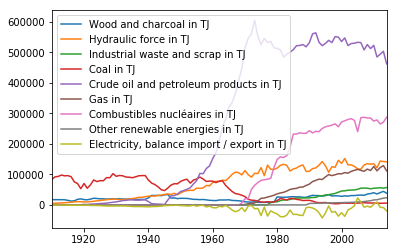

In [17]:
plt.figure(); 
final_data_tj.plot();

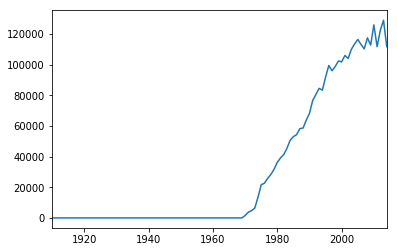

In [18]:
plt.figure(); 
final_data_tj['Gas in TJ'].plot();

However it's a little bit messy and we don't fully understand the plot. So for this we will use more plots

In [19]:
def shared_plot_by(df):
    cols = df.columns.values
    half_nb_cols = int(len(cols)/2)
    cols1 = cols[:half_nb_cols]
    cols2 = cols[half_nb_cols:]
        
    fig, axs = plt.subplots(1, 2, figsize=(20,6), sharey=True)
    df[cols1].plot(ax=axs[0], title = "First half")
    df[cols2].plot(ax=axs[1], title = "Second half")
    
    plt.show()

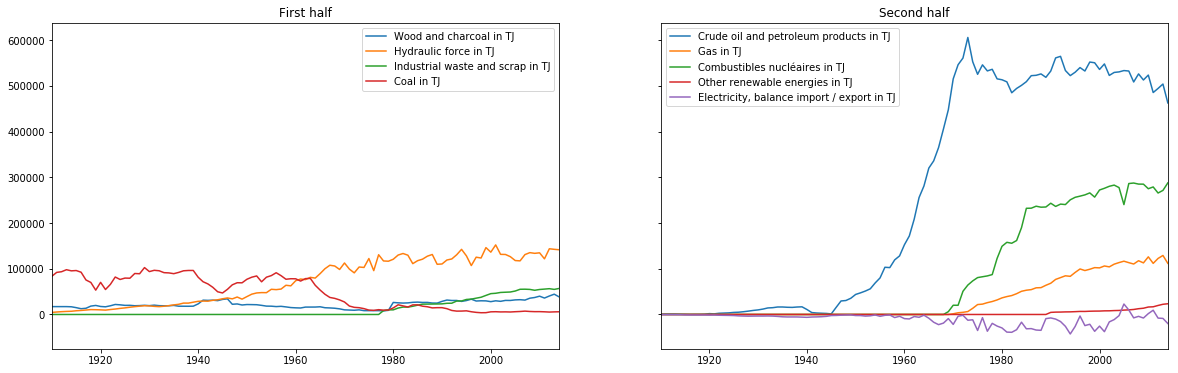

In [20]:
shared_plot_by(final_data_tj)

Here we can see the results better. Furthermore, the y axis is shared so the comparaison will be easier to do. For example we can that since 1945 the Swiss oil consumption has risen sharply as nuclear combustible since 1970.  Other energy like the coal and charcoal are almost gone. However for our project we are interested about the energy transition towards renewable energies. Here we can see that since approximately 2011 there is a transition. Indeed since Fukushima in 2011, we can see that Switzerland has begun its energetic transition. In addition, during a vote held in May 2017, the Swiss voted 58.2% in favor of a gradual withdrawal of nuclear power to the benefit of renewable energy, more respectful of the environment. <br>
Here we see the production in TJ for each energy but what about the Total energy consumed?

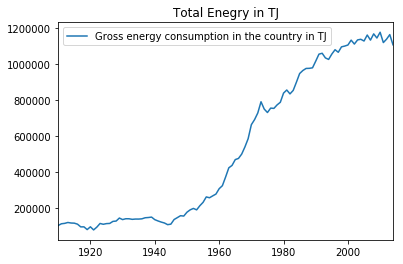

In [21]:
final_data_tj_full.plot(title = "Total Enegry in TJ")

This confirms what was said earlier. Indeed we can see that after the war of 1945, the consumption of energy drastically increased because it is necessary to rebuild and to have the same status of the United States, the world's leading country. The baby boom around 1965 can also explain this crazy energy consumption. However we see more and more that the energy consumption slowed down and sometimes even decreased. It is a general awareness and respect for the environment that has helped to reduce this almost exponential growth. Switzerland is indeed in an energy transition that is just beginning.

Secondly, we will see by year the evolution of the enery production in Switzerland in %

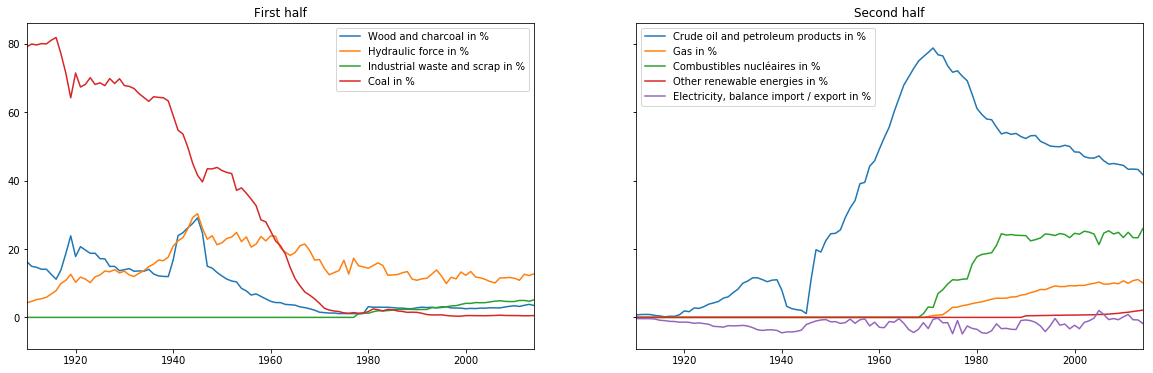

In [22]:
shared_plot_by(final_data_perc)

With these graphs, the result is a lot more striking. Indeed, we can see that coal accounted for 80% of energy production in 1900 and today nothing at all and it's the same for the wood and charcoal. We can also see that oil accounts for 80% of energy consumption in 1970. The reason is that oil at that time was cheap energy and there was plenty of it. This is why oil will gradually dethrone coal in countries where it is rare. Switzerland was not apart and was following the technological advances and unfortunately did not pass through the oil crisis in the 1970s.  That's why it will reduce its oil consumption and find other energies. <br> 
That's at this moment that we can see an increase in gas and nuclear energy. Finally we can see that today Switzerland is in an energetic transition because the renewable energies start to be used and the consumption of nuclear and oil continues to decrease <br> 
What is also striking is that already in 1940, the hydrolic force was already used and accounted for 40% of energy consumption in Switzerland. However, if we only analyze this graph we can say that the production of hydrolic energy has decreased. But this is not the case because thanks to the graphs above, we can see that the production of hydrolic energy in TJ continues to increase. Unfortunately with such energy consumption, hydropower alone is not enough and that is why in our graphs, this consumption decreases. It is therefore important to study the graphs at the same time so as not to get false results

# the Evolution of the population

if we can find relation between the increase of the population and the increase of the energy consumption (see the ratio and what a lambda person "use" each year)

### Import data

In [23]:
swiss_population_path = 'Data/population_Suisse.xlsx'
metadata_swiss_pop = pd.read_excel(swiss_population_path, index_col = 0, header = 3)

In [24]:
metadata_swiss_pop.head()

,population,Naissances,Décès 3),Accroissement,Immigrations 4),Emigrations 4),Solde,Acquisition de,Divergences,population.1,en nombres,en %
NaN,au 1er janvier 2),vivantes 3),NaN,naturel 3),NaN,NaN,migratoire 5),la nationalité,statistiques,au 31 décembre 2),absolus,NaN
NaN,NaN,,NaN,,NaN,NaN,NaN,suisse 6),,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1861,2515396,74820,57520.0,17300,...,...,381,...,...,2533077,17681,0.702911
1862,2533077,75870,51070.0,24800,...,...,-3620,...,...,2554257,21180,0.836137


### Clean Data

In [25]:
metadata_swiss_pop2 = metadata_swiss_pop[3:]

In [26]:
metadata_swiss_pop2.head()

,population,Naissances,Décès 3),Accroissement,Immigrations 4),Emigrations 4),Solde,Acquisition de,Divergences,population.1,en nombres,en %
1861,2515396,74820,57520.0,17300,...,...,381,...,...,2533077,17681,0.702911
1862,2533077,75870,51070.0,24800,...,...,-3620,...,...,2554257,21180,0.836137
1863,2554257,79160,54360.0,24800,...,...,-3408,...,...,2575649,21392,0.837504
1864,2575649,79600,59500.0,20100,...,...,-1194,...,...,2594555,18906,0.734029
1865,2594555,78290,59090.0,19200,...,...,-2653,...,...,2611102,16547,0.637759


In [27]:
metadata_swiss_pop2.columns.values

array(['population', 'Naissances', 'Décès 3)', 'Accroissement',
       'Immigrations 4)', 'Emigrations 4)', 'Solde', 'Acquisition de',
       'Divergences', 'population.1', 'en nombres', 'en %'], dtype=object)

We just need to keep the most important data and drop the others

In [28]:
swiss_pop_drop = metadata_swiss_pop2.drop(['Immigrations 4)'], axis=1).drop(['Emigrations 4)'], axis=1).drop(['Solde'], axis=1).drop(['Acquisition de'], axis=1).drop(['Divergences'], axis=1)
swiss_pop_drop.head()

,population,Naissances,Décès 3),Accroissement,population.1,en nombres,en %
1861,2515396,74820,57520.0,17300,2533077,17681,0.702911
1862,2533077,75870,51070.0,24800,2554257,21180,0.836137
1863,2554257,79160,54360.0,24800,2575649,21392,0.837504
1864,2575649,79600,59500.0,20100,2594555,18906,0.734029
1865,2594555,78290,59090.0,19200,2611102,16547,0.637759


In [29]:
#Change the name of colums to add unit, either % or TJ (Tera Joule)
def change_col_name(df, new_name):
    new_df = df.copy()
    cols_df = new_df.columns.values 
    for i in range(len(cols_df)):
        if(len(cols_df) == len(new_name)):
            name = cols_df[i]
            new_df = new_df.rename(columns={name: new_name[i]})
    return new_df

In [30]:
new_name = ["Population January", "Birth", "Death", "Increase", "Population December", "Absolute values", "Values in %"]

swiss_pop_clean = change_col_name(swiss_pop_drop, new_name)
swiss_pop_clean.head()

,Population January,Birth,Death,Increase,Population December,Absolute values,Values in %
1861,2515396,74820,57520.0,17300,2533077,17681,0.702911
1862,2533077,75870,51070.0,24800,2554257,21180,0.836137
1863,2554257,79160,54360.0,24800,2575649,21392,0.837504
1864,2575649,79600,59500.0,20100,2594555,18906,0.734029
1865,2594555,78290,59090.0,19200,2611102,16547,0.637759


Now, we have good data and we can use them to analyse our previous data

### Analysis

# The nuclear production

In [31]:
PRODUCTION_NAME = 'Production en Gwh'
ELEC_USED_NAME = 'Production utilisee (%)'

### Import Data

We start by importing the data

In [32]:
nuclear_path = 'Data/nuclear_production.csv'
nuclear_data = pd.read_csv(nuclear_path, delimiter=",")

In [33]:
nuclear_data.head(4)

,num,Year,Power plant,production/ used electricity
0,22298.0,1990,Total,electric production in Gwh
1,86.6,1990,Total,used electricity %
2,2540.0,1990,Beznau 1,electric production in Gwh
3,83.3,1990,Beznau 1,used electricity %


The data contains in fact two kinds of data: electric production and % electricity used. We want to split both kinds of data in separate dataframe and index them by 'Centrale' and then by year using a multiindex. This way it will be easy to plot and see the evolution of production for each centrale through years

In [34]:
# Reorder columns
re_cols = ['Power plant', 'Year', 'production/ used electricity', 'num']
nuclear_recols = nuclear_data[re_cols]
nuclear_recols.head(2)

,Power plant,Year,production/ used electricity,num
0,Total,1990,electric production in Gwh,22298.0
1,Total,1990,used electricity %,86.6


In [35]:
# Split the data in two categories: production and electricity used
def split_df(df):
    prod = nuclear_recols[::2].drop('production/ used electricity', axis=1)
    elec_used = nuclear_recols[1::2].drop('production/ used electricity', axis=1)
    return prod, elec_used

In [36]:
production_df, elec_used_df = split_df(nuclear_recols)

In [37]:
production_df.head(2)

,Power plant,Year,num
0,Total,1990,22298.0
2,Beznau 1,1990,2540.0


In [38]:
elec_used_df.head(2)

,Power plant,Year,num
1,Total,1990,86.6
3,Beznau 1,1990,83.3


In [39]:
# Create hierarchical index from a dataframe. cols are the columns that will become index, asc takes 1 or 0 per column
# whether you want to index in ascending order or not, valname is the name you want to give to the data
def index_by(cols, df, asc, valname):
    new_df = df.copy()
    new_df.set_index(cols, inplace = True)
    new_df.sort_index(level = cols, ascending = asc, inplace = True)
    new_df.columns = [valname]
    return new_df

In [40]:
prod_idxd = index_by(['Power plant', 'Year'], production_df, [1,1], PRODUCTION_NAME)
prod_idxd.head(3)

Production en Gwh
Power plant Year                   
Beznau 1    1990             2540.0
            1991             2474.0
            1992             2456.0

In [41]:
elec_idxd = index_by(['Power plant', 'Year'], elec_used_df, [1,1], ELEC_USED_NAME)
elec_idxd.head(3)

Production utilisee (%)
Power plant Year                         
Beznau 1    1990                     83.3
            1991                     81.2
            1992                     80.3

In [42]:
# Remove 'Total' column from df and return it
def remove_total(df):
    total = elec_idxd.loc['Total']
    df.drop('Total', inplace = True)
    return total

In [43]:
total_prod = remove_total(prod_idxd)

In [44]:
total_elec = remove_total(elec_idxd)

In [45]:
# Plots the dataframe values in two plots (half the data in each)
def plot_by_year(valname, df):
    df_unstacked = df.unstack().T.loc[valname]
    middle_idx = int(len(df_unstacked.columns)/2)
    split_val1 = df_unstacked.columns[middle_idx]
    split_val2 = df_unstacked.columns[middle_idx + 1]
    x = df_unstacked.loc[:, :split_val1]
    y = df_unstacked.loc[:, split_val2:]
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,5), sharey = True)
    plt.figure(); 
    x.plot(ax=ax1)
    y.plot(ax = ax2)
    #ax1.set_title('Sharing Y axis')

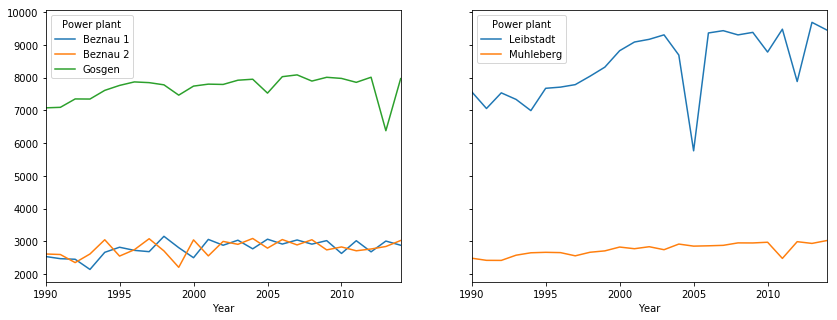

In [46]:
plot_by_year(PRODUCTION_NAME, prod_idxd)

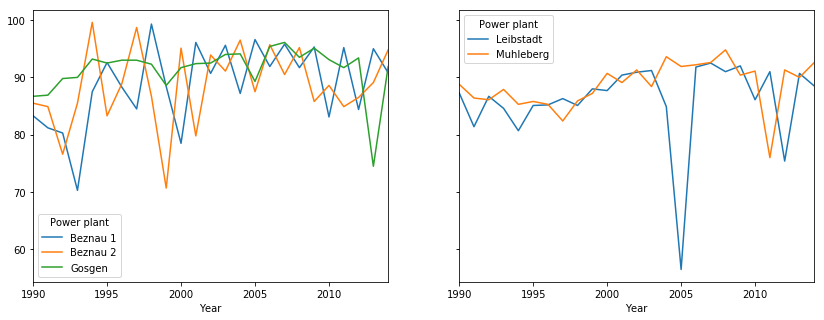

In [47]:
plot_by_year(ELEC_USED_NAME, elec_idxd)

We can explain the different peaks by looking in the [report](http://www.nuklearforum.ch/sites/default/files/media/Chronique_fr_2000_2005_0.pdf) of events related to Swiss power plants between 2000 and 2005 
For example, the biggest peak in the Leibstadt power plant is explained by the following quote:

Original quote in french
"(5043) 28 mars 2005 : une perturbation survenue à l’intérieur de l’alternateur entraîne un arrêt de la turbine de la
centrale nucléaire de Leibstadt. Le réacteur, qui n’est pas touché par l’événement, est ensuite mis à l’arrêt par l’équipe
d’exploitation."

Here is the list of the reports accessible from the [nuklearforum](http://www.nuklearforum.ch/fr/chronique_nucleaire) website  
[1975 - 1999](https://www.nuklearforum.ch/sites/default/files/media/Chronik_dt_fr_bis_1999.pdf)  
[2000 - 2005](http://www.nuklearforum.ch/sites/default/files/media/Chronique_fr_2000_2005_0.pdf)  
[2006 - 2011](http://www.nuklearforum.ch/sites/default/files/media/Chronik_fr_ab_2006_0.pdf)  
[2012 - 2013](https://www.nuklearforum.ch/sites/default/files/page/Chronik_fr_ab-01-01-2012%20bis%2031-12-2013.pdf)  
[2014](https://www.nuklearforum.ch/sites/default/files/page/Chronik_fr_des-01-01-2014.pdf)  
